# Titanic Survival Prediction Using Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from sklearn.metrics import precision_score,recall_score,classification_report
%matplotlib inline

In [2]:
os.chdir('./Data')

#### 1) Reading the Data

In [3]:
X = pd.read_csv('train.csv')
y = pd.read_csv('test.csv')
df =X.copy()

In [4]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
df.drop('PassengerId',axis=1,inplace=True)

In [6]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### Handling The Missing Values

#### Embarked column

In [7]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

0    S
Name: Embarked, dtype: object

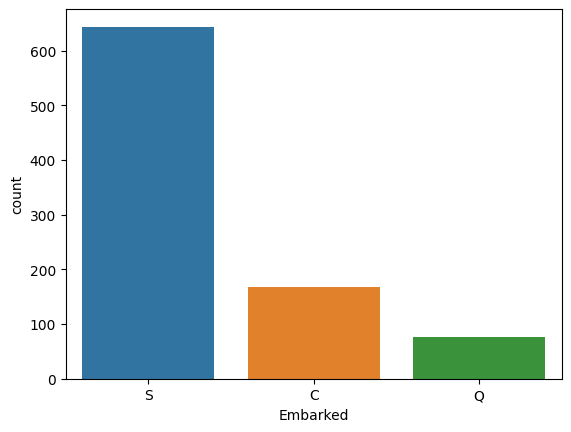

In [8]:
sns.countplot(x=df['Embarked'])
df['Embarked'].mode()

In [9]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [10]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

### Fare Column

In [11]:
y = y.fillna({'Fare':df['Fare'].mean()})

## Data Analysis

In [12]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

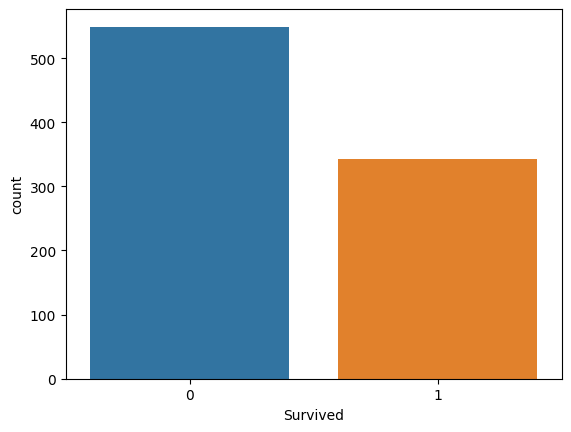

In [13]:
# passengers who survived 
sns.barplot(y=df['Survived'].value_counts(),x=df['Survived'].value_counts().index)

<Axes: xlabel='Survived', ylabel='count'>

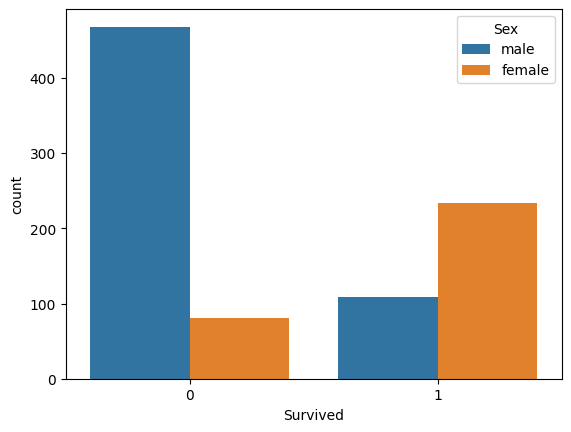

In [14]:
sns.countplot(x=df['Survived'],hue =df['Sex'])

<Axes: xlabel='Pclass', ylabel='count'>

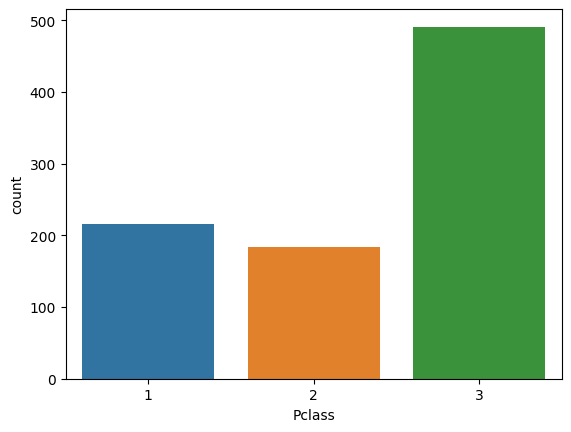

In [15]:
sns.countplot(x=df['Pclass'])

In [16]:
df.drop(['Ticket','Name','Cabin'],axis=1,inplace=True)

### Encoding the Data

In [17]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [18]:
X_train = df.drop('Survived',axis=1)
X_test = y.drop(['Name','Cabin','Ticket','PassengerId'],axis=1)
y_train = df['Survived']
y_test = pd.read_csv('gender_submission.csv')

In [19]:
X_test['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [20]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [21]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


# Logistic Regression And Pipeline

In [22]:
# 1) Ordinal Encoder
ord_encode_Embarked = OrdinalEncoder(categories=[['Q', 'S', 'C'],['male', 'female']])
ct_encoder = ColumnTransformer([
    ('tnf1',ord_encode_Embarked,[6,2])

],remainder='passthrough')

# 2) Simple Imputer
ct_imputer = ColumnTransformer([
    ('tnf1',SimpleImputer(),[2])
],remainder='passthrough')

# PIPELINE
pipe = Pipeline([
    ('Impute',ct_imputer),
    ('Ordinal Encode',ct_encoder),
    ('sd',LogisticRegression(max_iter=500))
])

pipe.fit(X_train,y_train)

Pipeline(steps=[('Impute',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf1', SimpleImputer(),
                                                  [2])])),
                ('Ordinal Encode',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf1',
                                                  OrdinalEncoder(categories=[['Q',
                                                                              'S',
                                                                              'C'],
                                                                             ['male',
                                                                              'female']]),
                                                  [6, 2])])),
                ('sd', LogisticRegression(max_iter=500))])

In [23]:
y_pred = pipe.predict(X_test)

In [24]:
accuracy_score(y_test['Survived'].to_numpy(),y_pred)

0.9473684210526315

In [25]:
print('Precision Score is ',precision_score(y_test['Survived'].to_numpy(),y_pred))
print('Recall Score is ',recall_score(y_test['Survived'].to_numpy(),y_pred))
f1_score(y_test['Survived'].to_numpy(),y_pred)

Precision Score is  0.9113924050632911
Recall Score is  0.9473684210526315


0.9290322580645162

In [28]:
print(classification_report(y_test['Survived'],y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       266
           1       0.91      0.95      0.93       152

    accuracy                           0.95       418
   macro avg       0.94      0.95      0.94       418
weighted avg       0.95      0.95      0.95       418



- Class 0 -> 97% precision at 95% recall
- Class 1 -> 91% precision at 95% recall 

# Exporting the Model

In [30]:
import pickle 
pickle.dump(pipe,open('model.pkl','wb'))

# END